# Analises a serem feitas:
- Como funciona a migração de estudantes por estados?(Criar mapa com flechas de onde para onde existe mais migração por estado)
- Existe diferença quando compara-se os dados de um semestre para o outro? 
- Fazer as analises anteriores a nivel BR e para UTFPR.

## Imports

In [2]:
import keras
import numpy as np
import pandas as pd
import tensorflow
import matplotlib.pyplot as plt
import statistics as stt
import csv
from datetime import datetime

## Carregamentos

In [3]:
end = 'C:/Users/raphi/OneDrive/Área de Trabalho/horas de ext/'
ListReg_20_2 = pd.read_csv(end + 'ListagemChamadaRegular_2020-2.csv', sep=';')  
ListReg_21_1 = pd.read_csv(end + 'ListagemChamadaRegular_2021-1.csv', sep=';')  
ListEsp_20_2 = pd.read_csv(end + 'ListagemListaEspera_2020-2.csv',sep='|', encoding='latin-1')  
ListEsp_21_1 = pd.read_csv(end + 'ListagemListaEspera_2021-1.csv',sep='|', encoding='latin-1')  

C:\Users\raphi\AppData\Local\Temp\ipykernel_6624\134782997.py:2: DtypeWarning: Columns (19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  ListReg_20_2 = pd.read_csv(end + 'ListagemChamadaRegular_2020-2.csv', sep=';')
C:\Users\raphi\AppData\Local\Temp\ipykernel_6624\134782997.py:3: DtypeWarning: Columns (20,22) have mixed types. Specify dtype option on import or set low_memory=False.
  ListReg_21_1 = pd.read_csv(end + 'ListagemChamadaRegular_2021-1.csv', sep=';')
C:\Users\raphi\AppData\Local\Temp\ipykernel_6624\134782997.py:5: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  ListEsp_21_1 = pd.read_csv(end + 'ListagemListaEspera_2021-1.csv',sep='|', encoding='latin-1')


## Imprime graficos para ver diferença de vagas diponiveis e candidatos com vaga por estado

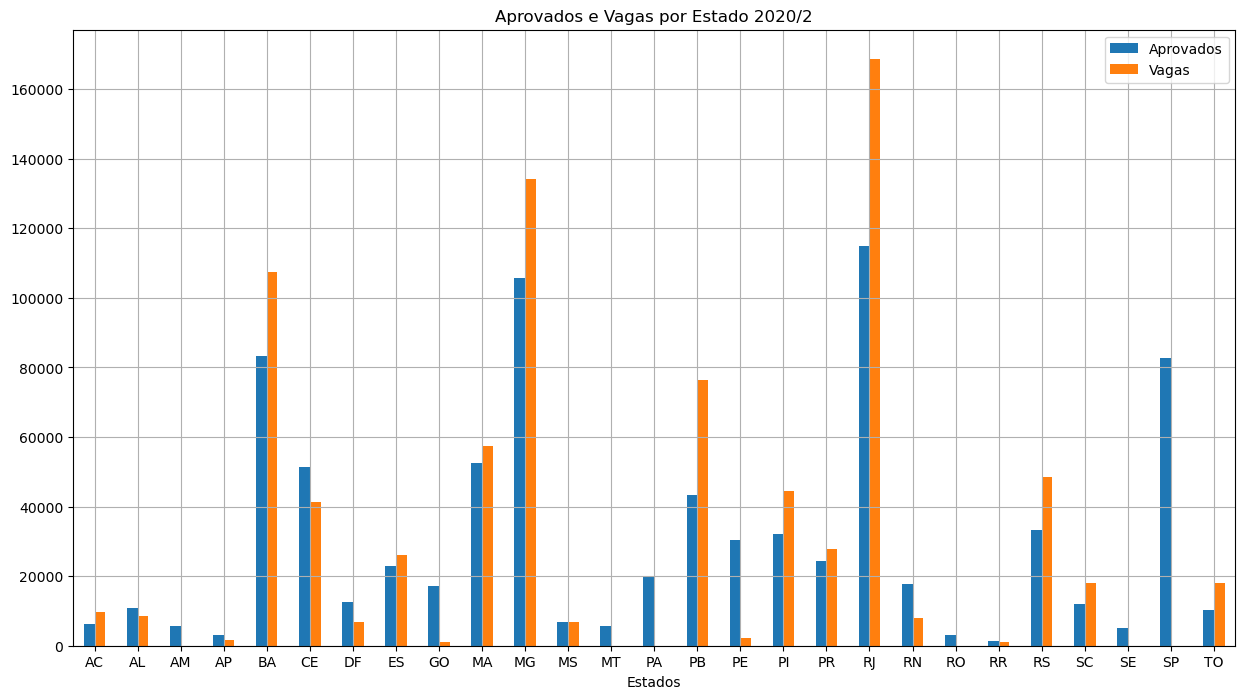

In [4]:
def imprime_aprovados_e_vagas_por_estados(dados):
    titulo = 'Aprovados e Vagas por Estado ' + str(dados['NU_ANO'][0]) + '/' + str(dados['NU_EDICAO'][0])
    ap_estado_br = dados.groupby('SG_UF_CANDIDATO').count()
    ap_estado_br = ap_estado_br['NU_ANO']
    ap_estado_br = ap_estado_br.rename_axis('Estados')
    vaga_estado_br = dados.groupby('SG_UF_CAMPUS').count()
    vaga_estado_br = vaga_estado_br['NU_ANO']
    vaga_estado_br = vaga_estado_br.rename_axis('Estados')
    vaga_ap_br = pd.DataFrame(ap_estado_br)
    vaga_ap_br['Vagas'] = vaga_estado_br
    vaga_ap_br.columns = ['Aprovados', 'Vagas']
    vaga_ap_br = vaga_ap_br.rename_axis('Estados')
    vaga_ap_br.plot(kind='bar',title=titulo, figsize=(15,8), rot=0, grid=True)
imprime_aprovados_e_vagas_por_estados(ListReg_20_2)

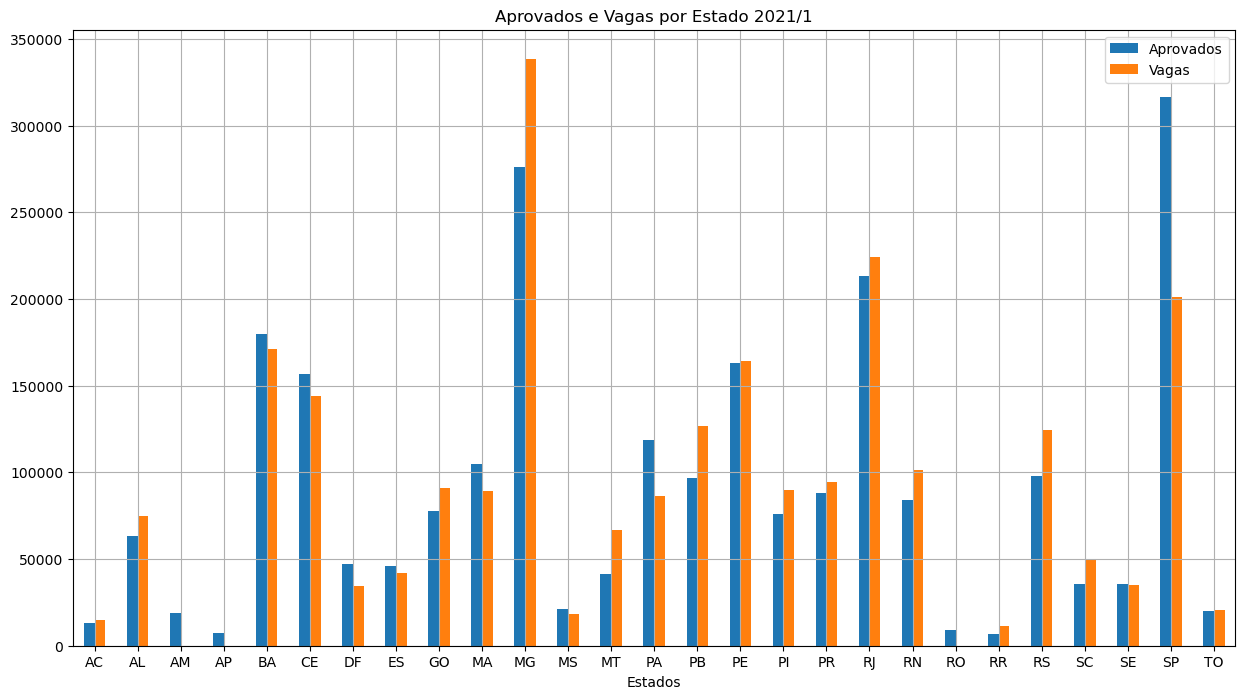

In [5]:
imprime_aprovados_e_vagas_por_estados(ListReg_21_1)

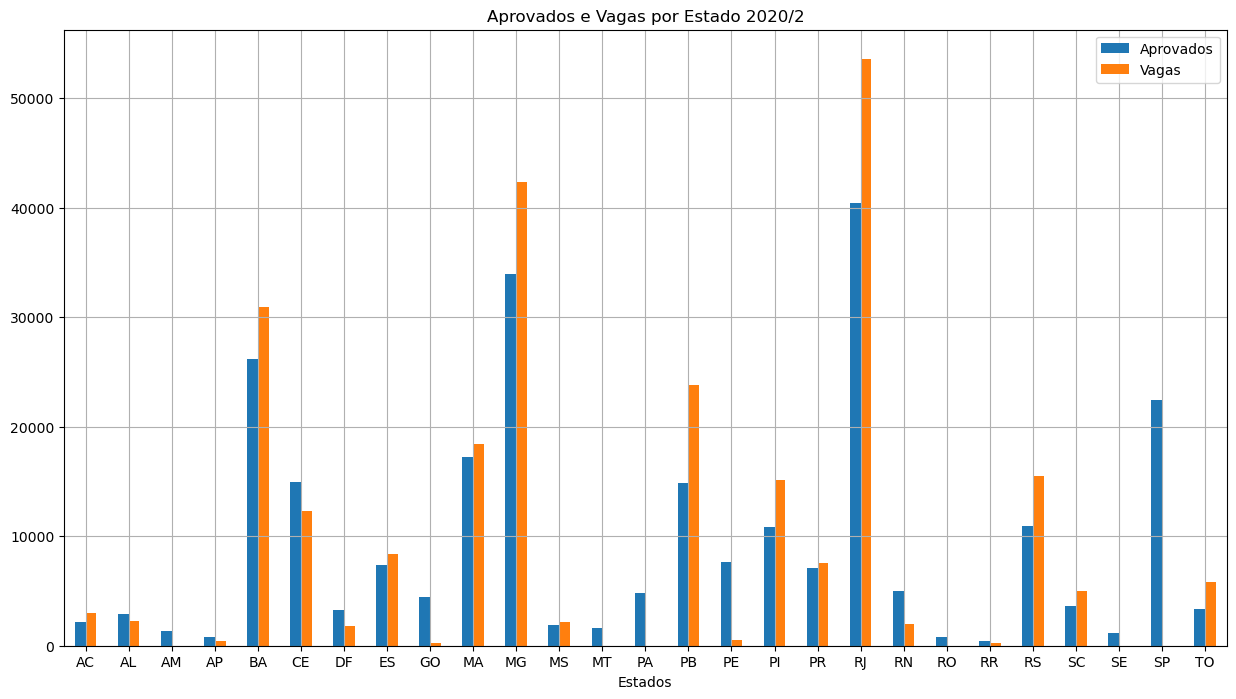

In [6]:
imprime_aprovados_e_vagas_por_estados(ListEsp_20_2)

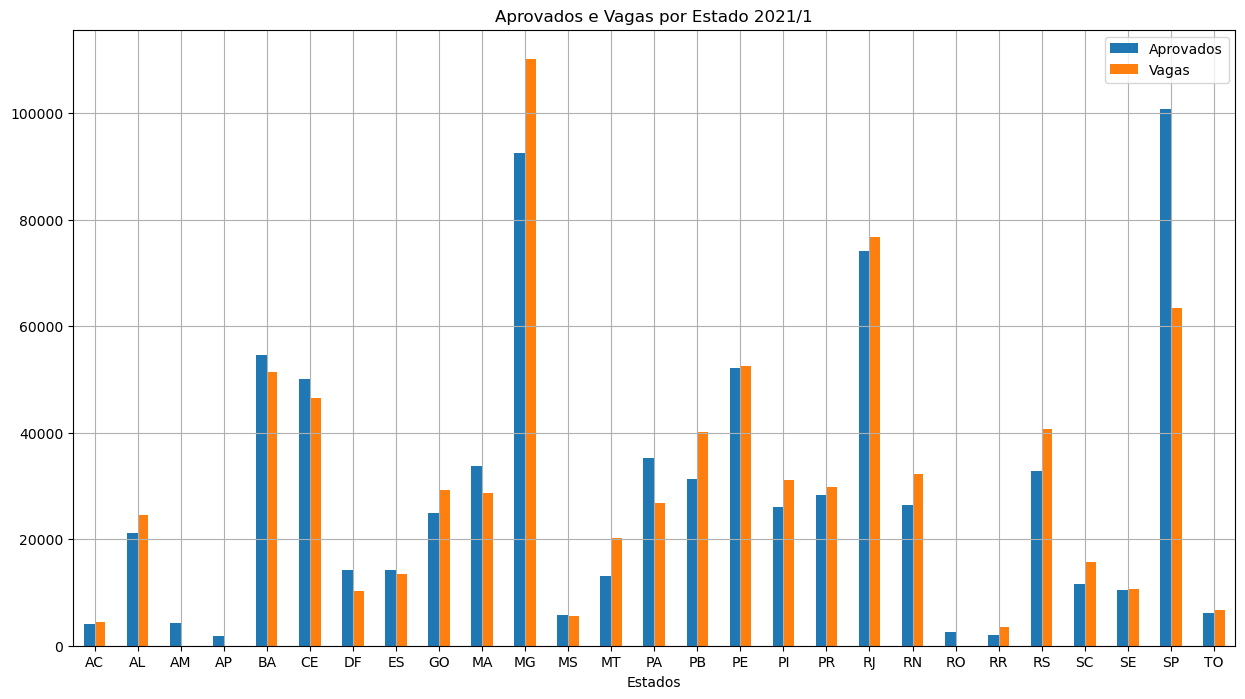

In [7]:
imprime_aprovados_e_vagas_por_estados(ListEsp_21_1)

## Verificação da quantidade dos alunos que vão para cada estado por estado.

In [8]:
estados = ListReg_20_2['SG_UF_CANDIDATO'].unique()
estados

array(['BA', 'SP', 'SE', 'AP', 'PE', 'AM', 'RJ', 'RN', 'PA', 'CE', 'RS',
       'DF', 'MG', 'PB', 'ES', 'MT', 'MS', 'PR', 'AL', 'TO', 'MA', 'AC',
       'SC', 'PI', 'GO', 'RR', 'RO'], dtype=object)

In [9]:
def imprime_qtd_de_alunos_do_estado(dados):
    estados = dados['SG_UF_CANDIDATO'].unique()
    saida = []
    for i in range(27):
        saida.append({'Estado': estados[i], 'Estudantes do estado': 0, 'Estudar': []})
    for i in range(27):
        for j in range(27):
            saida[j]['Estudar'].append({'UF': estados[i], 'QT':0})
    for i in range(len(dados['NU_ANO'])):#27
        for j in range(27):#len(dados['NU_ANO'])):
            if dados['SG_UF_CANDIDATO'][i] == saida[j]['Estado']:
                saida[j]['Estudantes do estado'] = 1 + saida[j]['Estudantes do estado']
                for k in range(27):
                    if saida[j]['Estudar'][k]['UF'] == dados['SG_UF_CAMPUS'][i]:
                        saida[j]['Estudar'][k]['QT'] = 1 + saida[j]['Estudar'][k]['QT']        
        
    return saida
imprime_qtd_de_alunos_do_estado(ListReg_20_2)

[{'Estado': 'BA',
  'Estudantes do estado': 83179,
  'Estudar': [{'UF': 'BA', 'QT': 74429},
   {'UF': 'SP', 'QT': 0},
   {'UF': 'SE', 'QT': 0},
   {'UF': 'AP', 'QT': 2},
   {'UF': 'PE', 'QT': 171},
   {'UF': 'AM', 'QT': 0},
   {'UF': 'RJ', 'QT': 1892},
   {'UF': 'RN', 'QT': 13},
   {'UF': 'PA', 'QT': 0},
   {'UF': 'CE', 'QT': 219},
   {'UF': 'RS', 'QT': 478},
   {'UF': 'DF', 'QT': 133},
   {'UF': 'MG', 'QT': 1831},
   {'UF': 'PB', 'QT': 881},
   {'UF': 'ES', 'QT': 839},
   {'UF': 'MT', 'QT': 0},
   {'UF': 'MS', 'QT': 56},
   {'UF': 'PR', 'QT': 372},
   {'UF': 'AL', 'QT': 90},
   {'UF': 'TO', 'QT': 400},
   {'UF': 'MA', 'QT': 298},
   {'UF': 'AC', 'QT': 243},
   {'UF': 'SC', 'QT': 200},
   {'UF': 'PI', 'QT': 615},
   {'UF': 'GO', 'QT': 15},
   {'UF': 'RR', 'QT': 2},
   {'UF': 'RO', 'QT': 0}]},
 {'Estado': 'SP',
  'Estudantes do estado': 82644,
  'Estudar': [{'UF': 'BA', 'QT': 6082},
   {'UF': 'SP', 'QT': 0},
   {'UF': 'SE', 'QT': 0},
   {'UF': 'AP', 'QT': 21},
   {'UF': 'PE', 'QT': 32},